#Performing **Binary Classification** (On Iris Dataset)

In [18]:
#Importig Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
#Step 2: Load the Iris Dataset
df = pd.read_csv("Iris.csv")
df.head(3)  # Display the first few rows


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


#**Perform EDA**



In [20]:
print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [21]:
# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 3


In [22]:
print(df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [24]:
print(df.isnull().sum())


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [25]:
print(df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


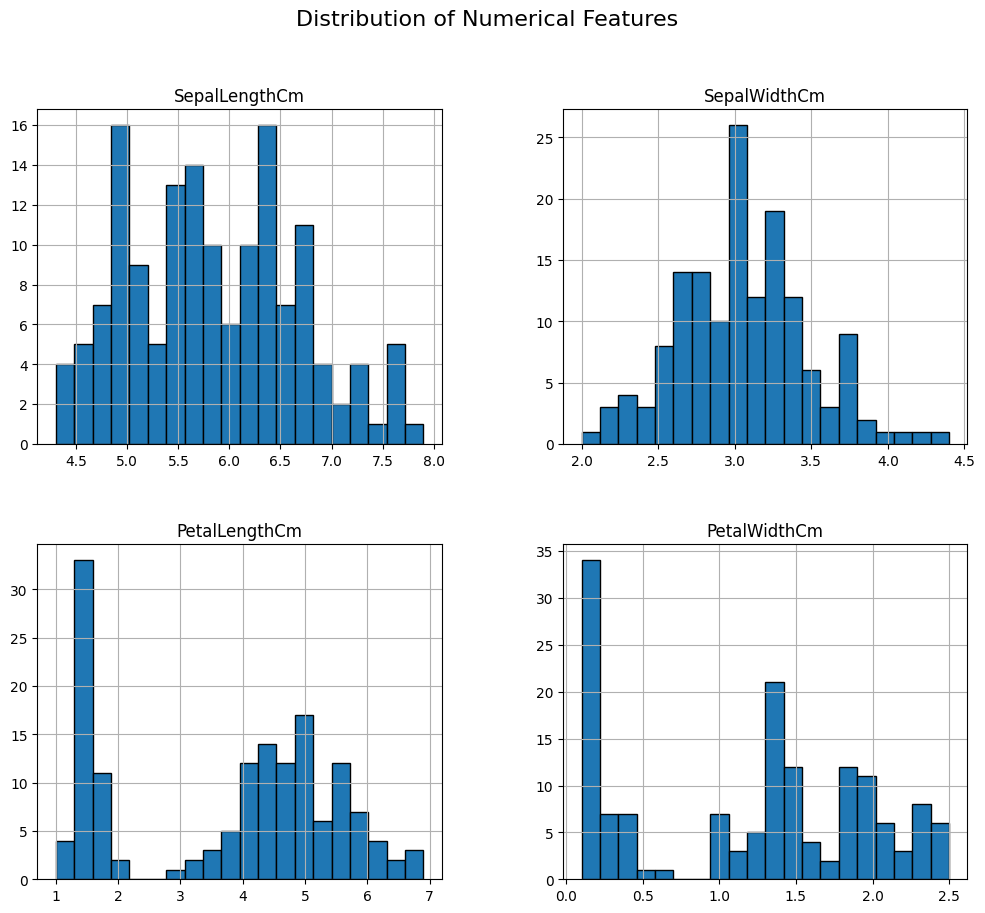

In [26]:
# Plot distribution of all numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


In [27]:
# Check value counts of target variable
print("\nClass Distribution:")
print(df['Species'].value_counts())


Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<ipython-input-28-9bd4889f3238>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Species'], palette=['blue', 'orange'])
<ipython-input-28-9bd4889f3238>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['Species'], palette=['blue', 'orange'])


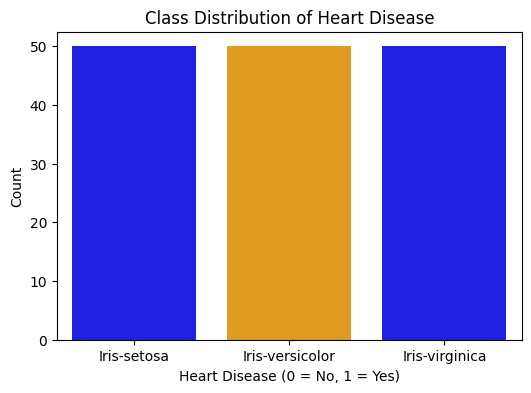

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Species'], palette=['blue', 'orange'])
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Perform all necessary Pre_processing**


In [29]:
#converting categorical feature using Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

**Split Data into X and Y**

In [30]:
#Split Data into X and Y
y=df.pop('Species')
x=df

In [31]:
#Split Data into Train Test Dataser
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


#**Applying ML Binary Classifier algorithm**

#Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
# ============== Logistic Regression ============== #
LR = LogisticRegression()
ModelLR = LR.fit(xtrain, ytrain)
PredictionLR = LR.predict(xtest)

print("=====================Logistic Regression Training Accuracy=============")
print(LR.score(xtrain, ytrain) * 100)

print("=====================Logistic Regression Testing Accuracy=============")
print(accuracy_score(ytest, PredictionLR) * 100)

print(classification_report(ytest, PredictionLR))
print(confusion_matrix(ytest, PredictionLR))


=====================Logistic Regression Training Accuracy=============
97.5
=====================Logistic Regression Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


#KNN

In [33]:
#Step 5: Train a Machine Learning Model using any Binary Classifier (Logistic Regression , SVM, KNN, etc)

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
ModelKNN = KNN.fit(xtrain,ytrain)
PredictionKNN = KNN.predict(xtest)

# =====================ACCUARACY===========================
print("=====================KNN Training Accuarcy=============")
tracKNN=KNN.score(xtrain,ytrain)
trainingAccKNN=tracKNN*100
print(trainingAccKNN)
print("====================KNN Testing Accuracy============")
teacKNN=accuracy_score(ytest,PredictionKNN)
testingAccKNN=teacKNN*100
print(testingAccKNN)

print(classification_report(ytest, PredictionKNN))
confusion_matrix(ytest, PredictionKNN)


=====================KNN Training Accuarcy=============
95.83333333333334
====================KNN Testing Accuracy============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  8]])

#Decision Tree

In [34]:

from sklearn.tree import DecisionTreeClassifier
# ============== Decision Tree Classifier ============== #
DT = DecisionTreeClassifier()
ModelDT = DT.fit(xtrain, ytrain)
PredictionDT = DT.predict(xtest)

print("=====================Decision Tree Training Accuracy=============")
print(DT.score(xtrain, ytrain) * 100)

print("=====================Decision Tree Testing Accuracy=============")
print(accuracy_score(ytest, PredictionDT) * 100)

print(classification_report(ytest, PredictionDT))
print(confusion_matrix(ytest, PredictionDT))



=====================Decision Tree Training Accuracy=============
100.0
=====================Decision Tree Testing Accuracy=============
96.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


#SVM

In [35]:
from sklearn.svm import SVC
# ============== Support Vector Machine (SVM) ============== #
SVM = SVC()
ModelSVM = SVM.fit(xtrain, ytrain)
PredictionSVM = SVM.predict(xtest)

print("=====================SVM Training Accuracy=============")
print(SVM.score(xtrain, ytrain) * 100)

print("=====================SVM Testing Accuracy=============")
print(accuracy_score(ytest, PredictionSVM) * 100)

print(classification_report(ytest, PredictionSVM))
print(confusion_matrix(ytest, PredictionSVM))



=====================SVM Training Accuracy=============
96.66666666666667
=====================SVM Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


#Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
# ============== Random Forest Classifier ============== #
RF = RandomForestClassifier()
ModelRF = RF.fit(xtrain, ytrain)
PredictionRF = RF.predict(xtest)

print("=====================Random Forest Training Accuracy=============")
print(RF.score(xtrain, ytrain) * 100)

print("=====================Random Forest Testing Accuracy=============")
print(accuracy_score(ytest, PredictionRF) * 100)

print(classification_report(ytest, PredictionRF))
print(confusion_matrix(ytest, PredictionRF))


=====================Random Forest Training Accuracy=============
100.0
=====================Random Forest Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


#Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
# ============== Naïve Bayes (GaussianNB) ============== #
NB = GaussianNB()
ModelNB = NB.fit(xtrain, ytrain)
PredictionNB = NB.predict(xtest)

print("=====================Naïve Bayes Training Accuracy=============")
print(NB.score(xtrain, ytrain) * 100)

print("=====================Naïve Bayes Testing Accuracy=============")
print(accuracy_score(ytest, PredictionNB) * 100)

print(classification_report(ytest, PredictionNB))
print(confusion_matrix(ytest, PredictionNB))

=====================Naïve Bayes Training Accuracy=============
95.83333333333334
=====================Naïve Bayes Testing Accuracy=============
96.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


#GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# ============== Gradient Boosting Classifier ============== #
GB = GradientBoostingClassifier()
ModelGB = GB.fit(xtrain, ytrain)
PredictionGB = GB.predict(xtest)

print("=====================Gradient Boosting Training Accuracy=============")
print(GB.score(xtrain, ytrain) * 100)

print("=====================Gradient Boosting Testing Accuracy=============")
print(accuracy_score(ytest, PredictionGB) * 100)

print(classification_report(ytest, PredictionGB))
print(confusion_matrix(ytest, PredictionGB))


=====================Gradient Boosting Training Accuracy=============
100.0
=====================Gradient Boosting Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
